# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [251]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [226]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
df = pd.read_csv('/content/foodhub_order.csv')

In [229]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [230]:
print(df.shape[0])
print(df.shape[1])

1898
9




```
# This is formatted as code
```

#### Observations: There are 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 4 int64 data types, 4 object data types, and 1 float64 data type.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [232]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [233]:
print(df.describe())

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations: Minimum is 20 minutes, Maximum is 35 minutes, and average is 27.37 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [234]:
print(df['rating'].value_counts().get('Not given'))

736


#### Observations: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

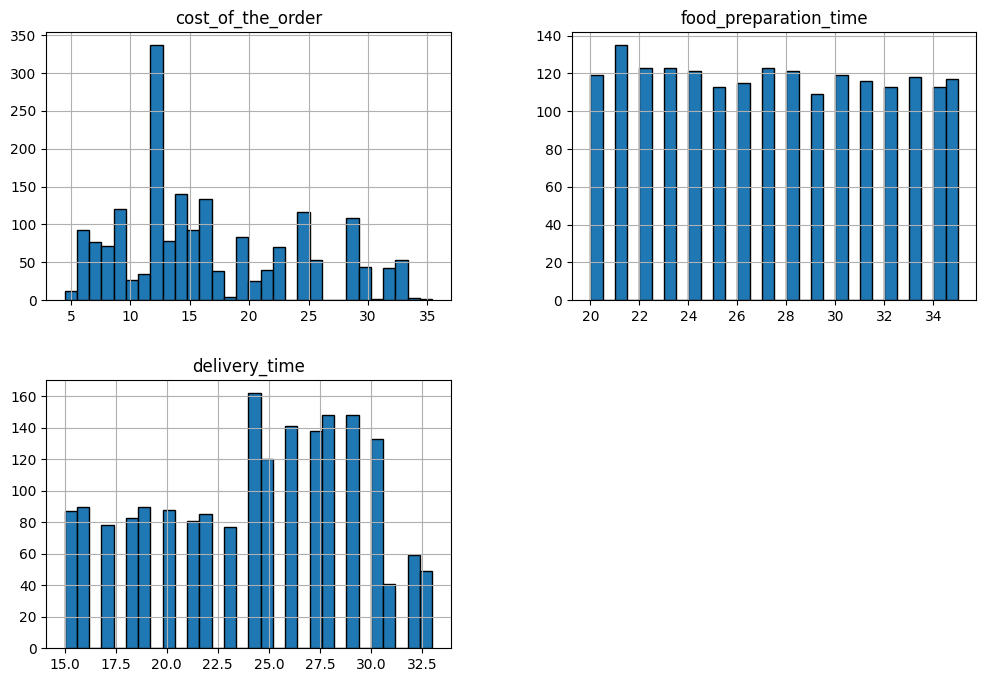

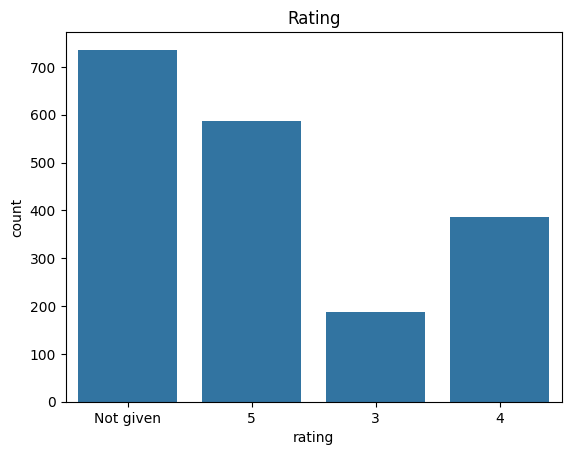

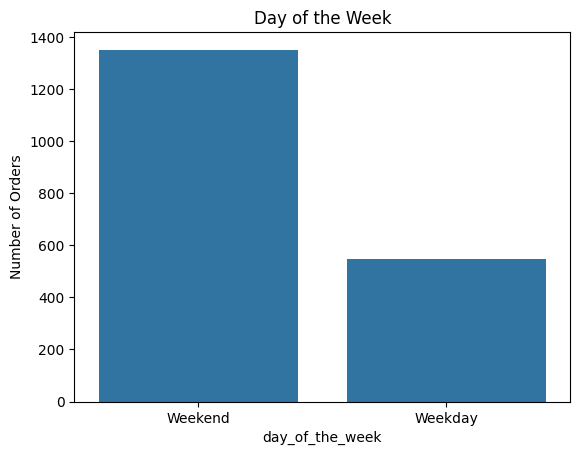

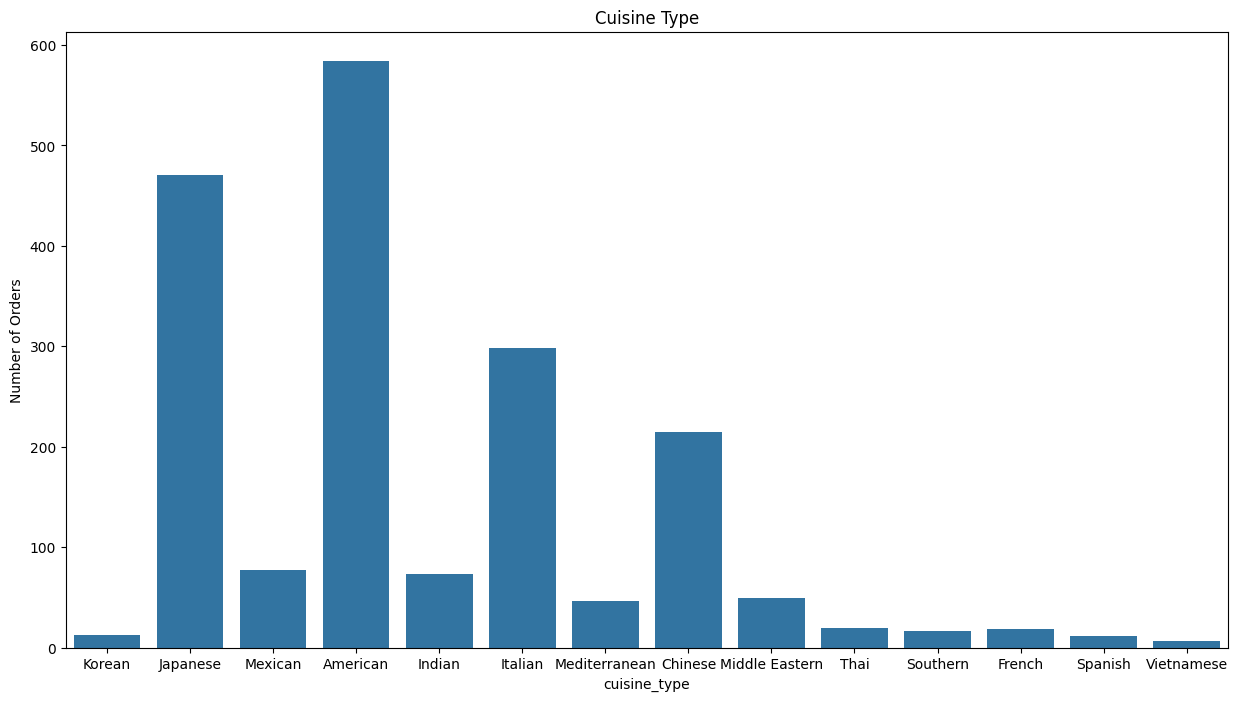

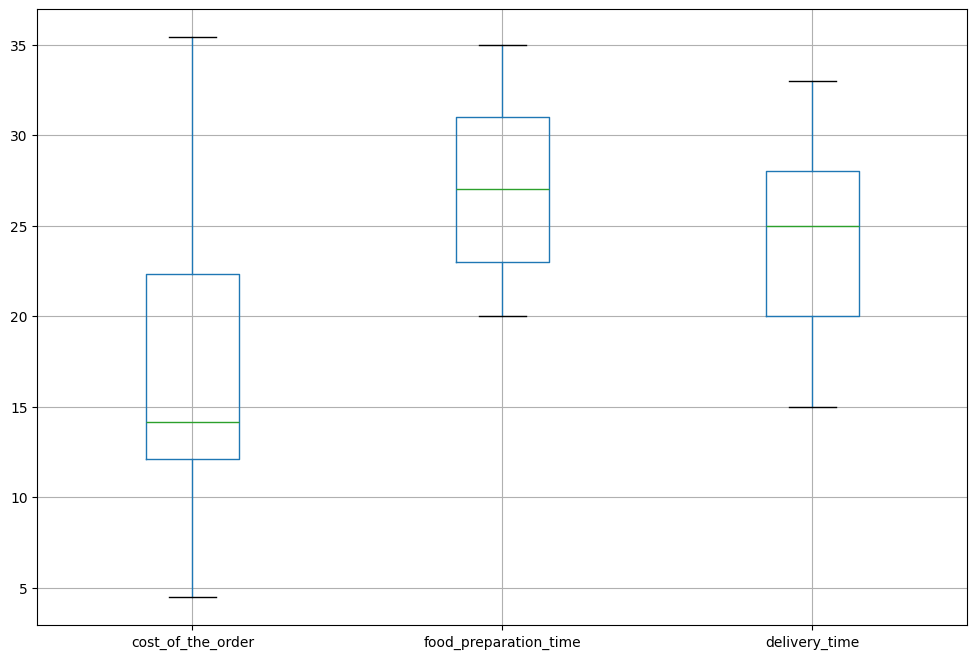

In [235]:
df.drop(columns=['customer_id','order_id']).hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.show()

sns.countplot(x=df['rating'])
plt.title('Rating')
plt.show()

sns.countplot(x=df['day_of_the_week'])
plt.ylabel('Number of Orders')
plt.title('Day of the Week')
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(x=df['cuisine_type'])
plt.ylabel('Number of Orders')
plt.title('Cuisine Type')
plt.show()

df.drop(columns=['customer_id','order_id']).boxplot(figsize=(12, 8))
plt.show()

Observations: The most frequent cost of order value is between 10-15 dollars with the majority around the 12 -13 dollar range. Food preparation time varies from 20-35 minutes. Delivery time varies from 15 to 33 minutes with most frequent time being around 25 minutes. For ratings, ‘Not Given’ is the most frequent outcome followed by a rating of 5, 3, then lastly 4. Majority of orders were placed on a weekend rather than weekday. The most frequent cuisine type is American followed Japanese, Italian, and Chinese respectively.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

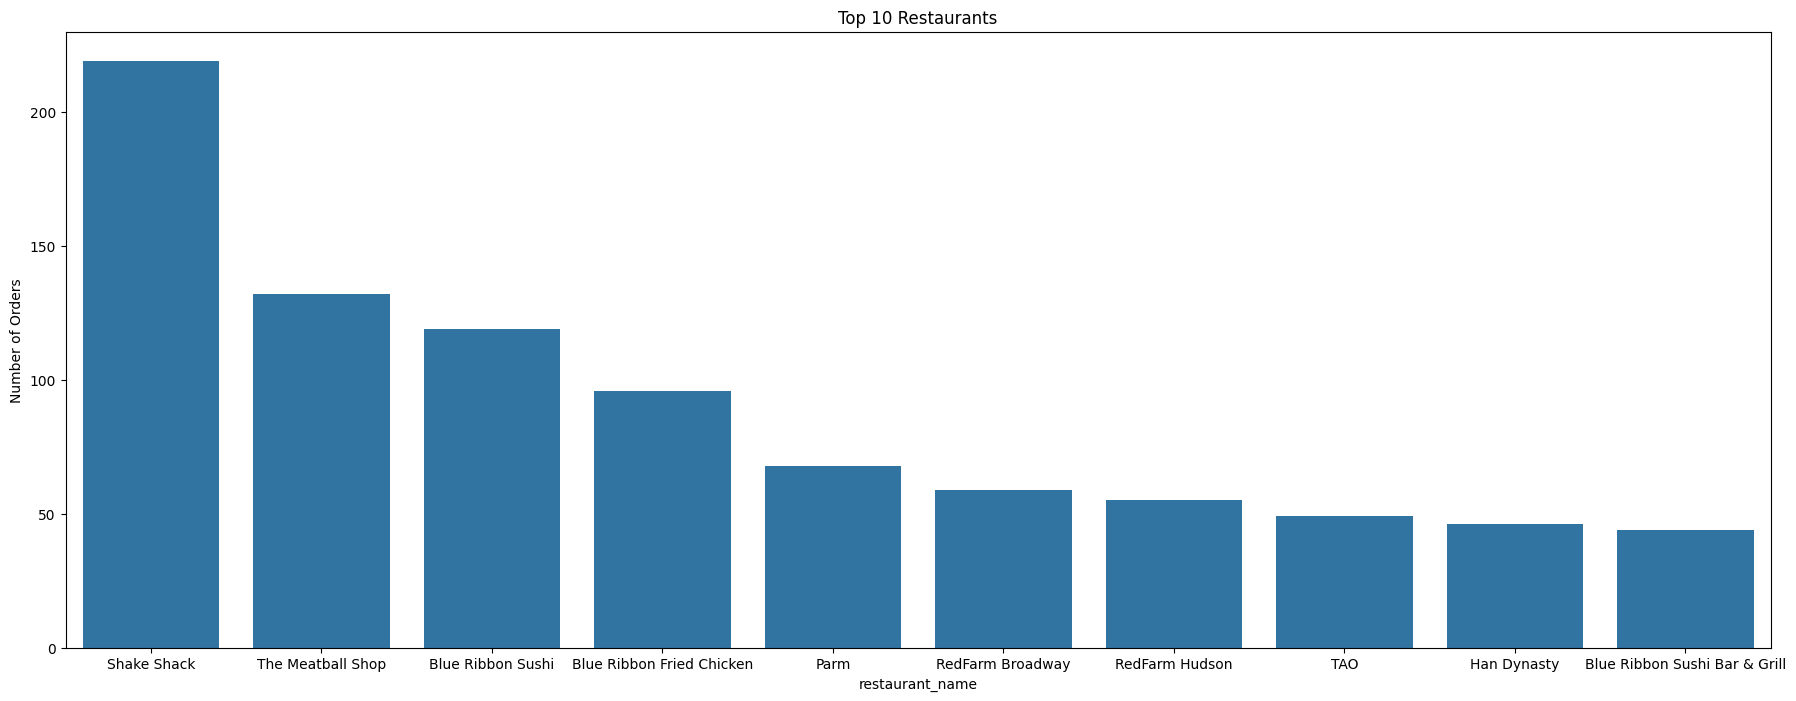

In [236]:
top_10_categories = df['restaurant_name'].value_counts().index[:10]
plt.figure(figsize=(22, 8))
sns.countplot(x=df['restaurant_name'], order = top_10_categories)
plt.ylabel('Number of Orders')
plt.title('Top 10 Restaurants')
plt.show()

#### Observations: The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

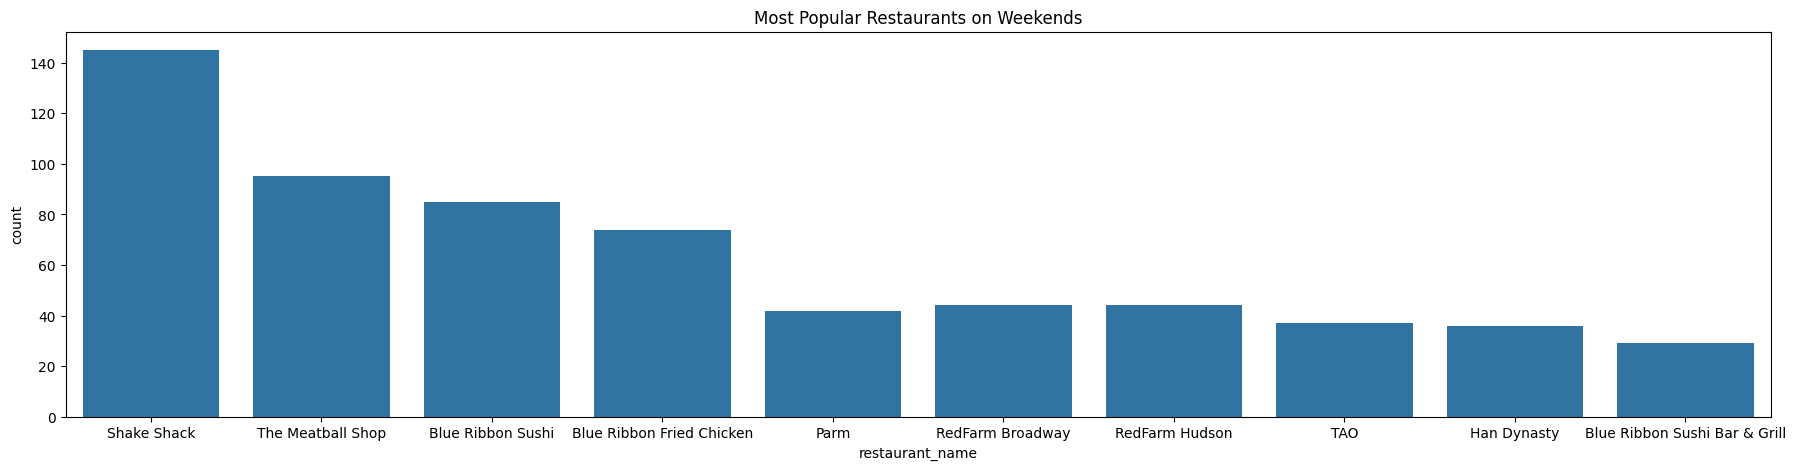

In [237]:
filtered_df = df[df['day_of_the_week'] == 'Weekend']
top_10_categories = df['restaurant_name'].value_counts().index[:10]

# Plotting with Seaborn
plt.figure(figsize=(22, 5))
sns.countplot(x='restaurant_name', data=filtered_df, order = top_10_categories)
plt.title("Most Popular Restaurants on Weekends")
plt.show()

#### Observations: Shake Shack


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [238]:
filtered_df = df[df['cost_of_the_order'] > 20]
percentage = (filtered_df.shape[0] / df.shape[0]) * 100
print(percentage)

29.24130663856691


#### Observations: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [239]:
print(df['delivery_time'].mean())

24.161749209694417


#### Observations: 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [240]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: 52832 - 13 orders, 47440 - 10 orders , 83287 - 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


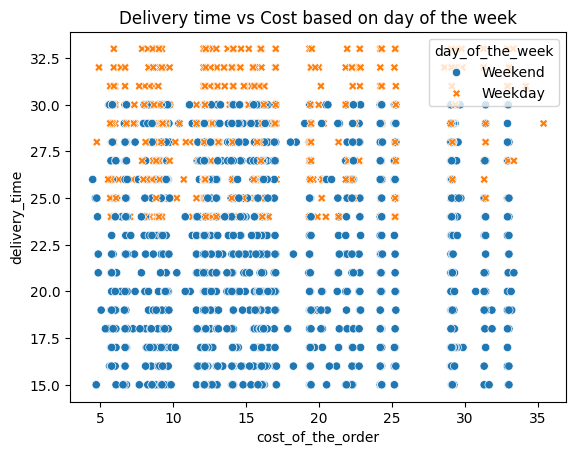

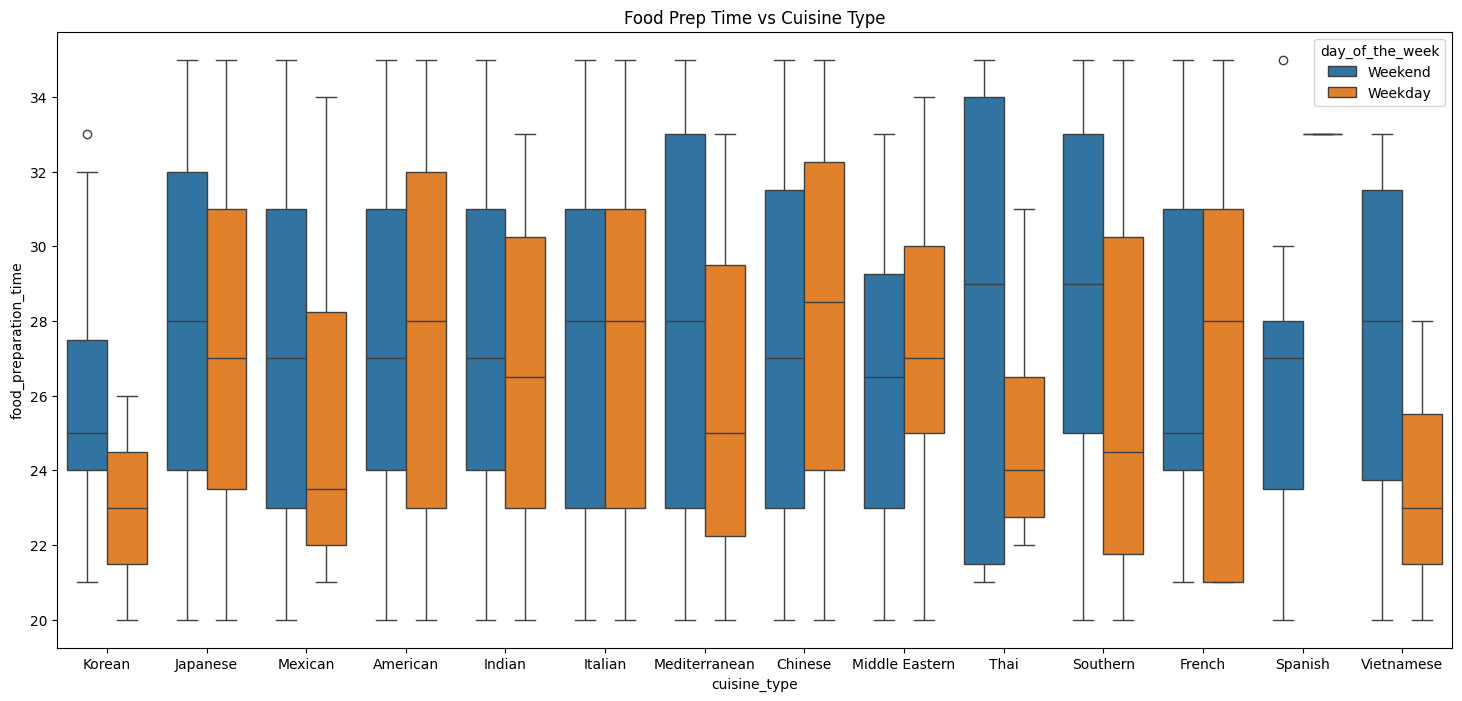

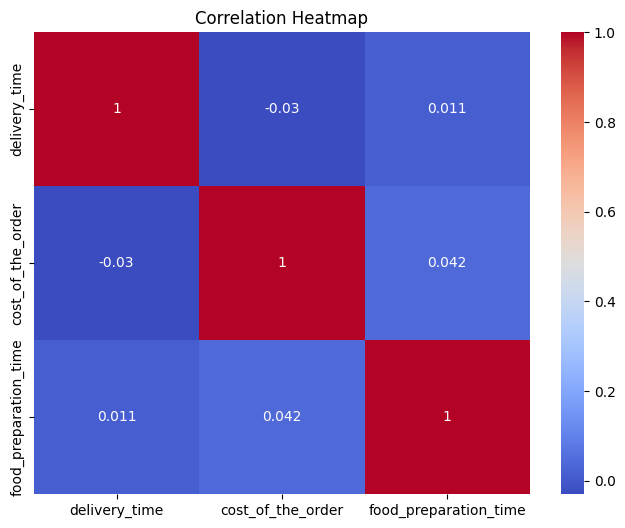

<ipython-input-241-3986a7420e88>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='restaurant_name', y='delivery_time', data=df, ci= None, order = top_10_categories)


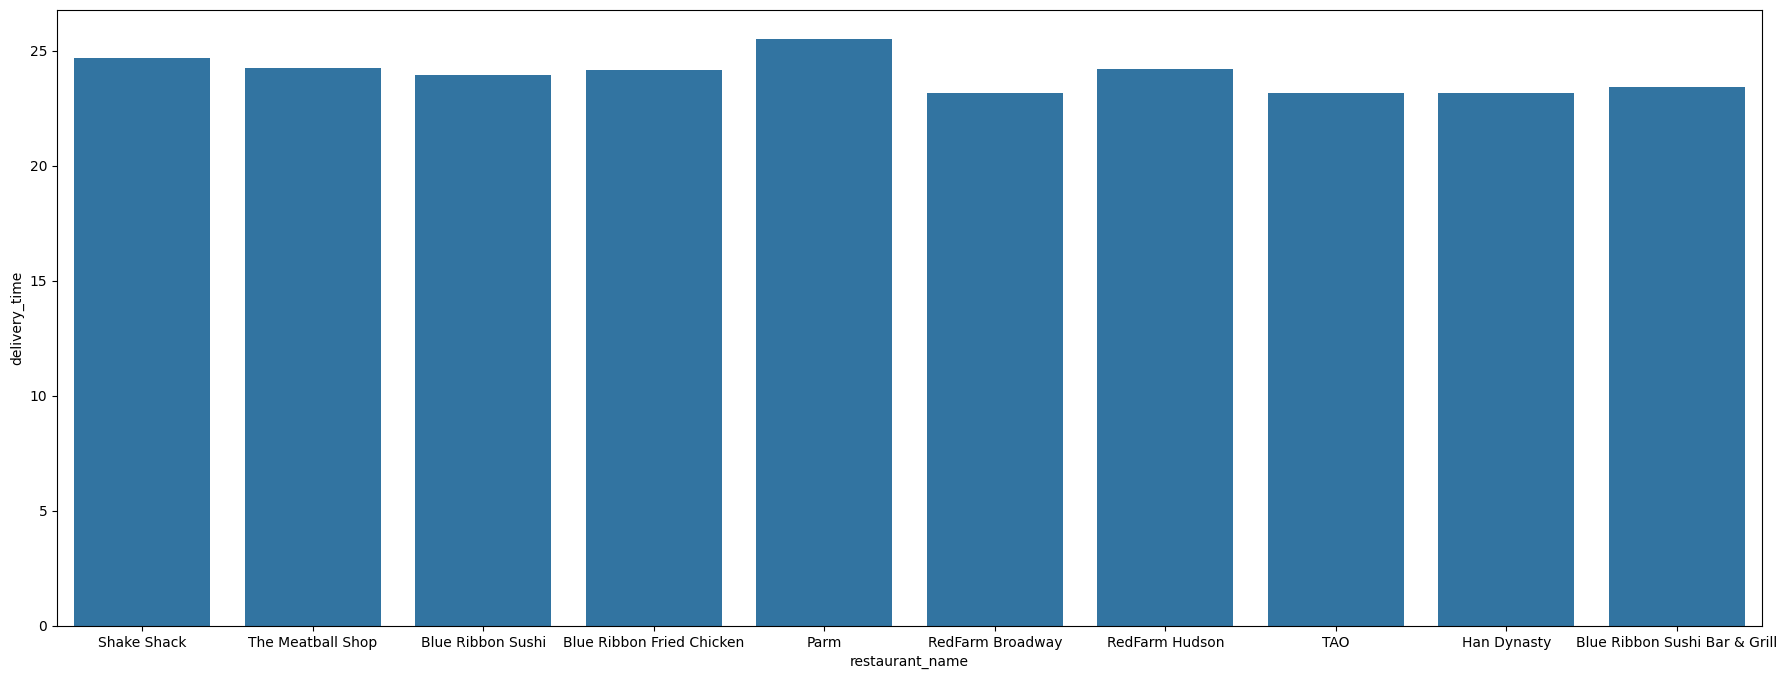

In [241]:
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', hue='day_of_the_week', style='day_of_the_week')
plt.title("Delivery time vs Cost based on day of the week")
plt.show()

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue='day_of_the_week')
plt.title("Food Prep Time vs Cuisine Type")

plt.figure(figsize=(8,6))
corr = df[['delivery_time', 'cost_of_the_order','food_preparation_time']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

top_10_categories = df['restaurant_name'].value_counts().index[:10]
plt.figure(figsize=(22, 8))
sns.barplot(x='restaurant_name', y='delivery_time', data=df, ci= None, order = top_10_categories)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [242]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
grouped_df = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    avg_rating=('rating', 'mean')).reset_index()
filtered_restaurants = grouped_df[(grouped_df['rating_count'] > 50) & (grouped_df['avg_rating'] > 4)]
print(filtered_restaurants)

               restaurant_name  rating_count  avg_rating
20   Blue Ribbon Fried Chicken            64    4.328125
21           Blue Ribbon Sushi            73    4.219178
136                Shake Shack           133    4.278195
153          The Meatball Shop            84    4.511905


#### Observations: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [243]:
def calculate_revenue(order_cost):
    if order_cost > 20:
        return order_cost * 0.25
    elif order_cost > 5:
        return order_cost * 0.15
    else:
        return 0
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
total_revenue = df['revenue'].sum()
print(total_revenue)

6166.303


#### Observations: $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [244]:
delivery_time = df['food_preparation_time'] + df['delivery_time']
percentage = (delivery_time[delivery_time > 60].count() / delivery_time.count()) * 100
print(percentage)

10.537407797681771


#### Observations: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [245]:
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations: Delivery time is higher during the weekdays. Weekday delivery time is 28.34 minutes and on weekends the delivery time is 22.47 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  It is clear that the majority of orders are being placed on weekends. It is also clear that the majority of orders are being placed from certain cuisines and certain restaurants are far more popular than others because of ratings, food prep time, and delivery time.

### Recommendations:

*  I would recommend to the business to customize ads to customers based on previous orders within the app to get a higher chance of re-order. I would also recommend looking into why certain delivery times are taking a lot longer than others and see if delivery routes can be optimized or if multiple deliveries can be given to a single driver if the customers' live near each other to save delivery time.

---